## PREDICT PATIENT SURVIVAL RATE USING DATA FROM FIRST 24HOURS OF INTENSIVE CARE

MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.
___

## PART 1 EDA_DEMOGRAPHIC + APACHE PREDICTION, COMORBIDITY & GROUPING
____

### I.IMPORT LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import datetime, warnings, scipy 
from scipy.stats import pearsonr
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from collections import Counter
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import missingno as msno

# warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set standard parameters
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [0]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Deep_Learning_Project  Healthcare  ML_Project


In [0]:
# !pip install tf-nightly-gpu-2.0-preview

In [0]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU not found')
# print('Found GPU at :{}'.format(device_name))

### II.IMPORT DATA

In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/training_v2.csv', low_memory = False)
dictionary = pd.read_csv('/content/drive/My Drive/Healthcare/Data/WiDS Datathon 2020 Dictionary.csv')

In [0]:
df.head(2)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,0,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,0,70.2,nan,108.0,203.0,0,0.0,n

___
### III.FUCTIONS

In [0]:
def check_missing_df(df):
    # look at how many missing values for the columns
    missing_values_count= df.isnull().sum()
    missing_values_percentage=np.round(df.isnull().sum()/df.shape[0]*100,2)

    #show it in dataframe
    data = {'Number_missing':missing_values_count, 'Missing_percentage':missing_values_percentage} 
    
    # Create DataFrame 
    missing_info = pd.DataFrame(data) 
    
    # Print the output. 
    display(missing_info.sort_values('Missing_percentage',ascending = False))

In [0]:
def plot_by_target(cols):
    fig, ax = plt.subplots(2, 2, figsize=(12, 7))

    X=[]
    for (i,j) in zip(cols[:2],cols[2:]):
        ax1 = sns.distplot(target_0[i], hist=True, kde=True, ax = ax[1][0])
        ax2 = sns.distplot(target_1[i], hist=True, kde=True, ax = ax[0][0])
        ax3 = sns.distplot(target_0[j], hist=True, kde=True, ax = ax[1][1])
        ax4 = sns.distplot(target_1[j], hist=True, kde=True, ax = ax[0][1])
        x_max = df[cols].describe()[7:].max(axis = 1)[0] + 1
        x_min = df[cols].describe()[3:4].min(axis = 1)[0] - 1
        X.extend([h.get_height() for h in ax1.patches])
        X.extend([h.get_height() for h in ax2.patches])
        X.extend([h.get_height() for h in ax3.patches])
        X.extend([h.get_height() for h in ax4.patches])
        ax[0][1].legend(['max','min'])
        y_max = max(X)
        ax1.set_xlim([x_min, x_max])
        ax2.set_xlim([x_min, x_max])
        ax3.set_xlim([x_min, x_max])
        ax4.set_xlim([x_min, x_max])
        ax1.set_ylim([0, y_max])
        ax2.set_ylim([0, y_max])
        ax3.set_ylim([0, y_max])
        ax4.set_ylim([0, y_max])
        ax1.set_xlabel("")
        ax2.set_xlabel("")
        ax3.set_xlabel("")
        ax4.set_xlabel("")
        ax1.set_title(i[:-4]+"_survived")
        ax2.set_title(i[:-4]+"_death")
        ax3.set_title(j[:-4]+"_survived")
        ax4.set_title(j[:-4]+"_death")

In [0]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row = row, col = col )
    facet.map(sns.kdeplot, var, shade= True )
    facet.set(xlim=(df[var].min(), df[var].max()))
    facet.add_legend()

___
### Dictionary

Learn more about the measurements: 

https://www.anzics.com.au/wp-content/uploads/2018/08/ANZICS-APD-Data-Dictionary.pdf

In [0]:
X=pd.DataFrame(dictionary.T.head(6))
X.columns=list(X.loc[X.index == 'Variable Name'].unstack())
X = X.loc[X.index != 'Variable Name']
df_dictionary = pd.DataFrame(df.describe())
df_dictionary = pd.concat([X,df_dictionary],axis=0)
df_dictionary.head(15)

,age,aids,albumin_apache,apache_2_bodysystem,apache_2_diagnosis,apache_3j_bodysystem,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,bilirubin_apache,bmi,bun_apache,cirrhosis,creatinine_apache,d1_albumin_max,d1_albumin_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_heartrate_max,d1_heartrate_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_sodium_max,d1_sodium_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus,elective_surgery,encounter_id,ethnicity,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,gender,glucose_apache,h1_albumin_max,h1_albumin_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_heartrate_max,h1_heartrate_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_resprate_max,h1_resprate_min,h1_sodium_max,h1_sodium_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_wbc_max,h1_wbc_min,heart_rate_apache,height,hematocrit_apache,hepatic_failure,hospital_admit_source,hospital_death,hospital_id,icu_admit_source,icu_admit_type,icu_id,icu_stay_type,icu_type,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,patient_id,ph_apache,pre_icu_los_days,pred,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
Category,demographic,APACHE comorbidity,APACHE covariate,APACHE grouping,APACHE covariate,APACHE grouping,APACHE covariate,APACHE prediction,APACHE prediction,APACHE covariate,APACHE covariate,APACHE covariate,demographic,APACHE covariate,APACHE comorbidity,APACHE covariate,labs,labs,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs blood gas,labs,labs,labs,labs,labs,labs,labs,labs,vitals,vitals,vitals,vitals,vitals,vitals,labs,labs,labs,labs,vitals,vitals,labs,labs,labs,labs,labs,labs,labs,labs,vitals,vitals,vitals,vitals,vitals,vitals,labs blood gas,labs blood gas,labs,labs,labs,labs,vitals,vitals,labs,labs,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,vitals,labs,labs,APACHE comorbidity,demographic,identifier,demographic,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,APACHE covariate,demographic,APACHE covariate,labs,labs,labs blood gas,labs blood gas,labs blood gas,labs blood gas

In [0]:
# Transpose dictionary
df_dictionary.T

,Category,Unit of Measure,Data Type,Description,Example,count,mean,std,min,25%,50%,75%,max
age,demographic,Years,numeric,The age of the patient on unit admission,None,87485.0,62.3,16.8,16.0,52.0,65.0,75.0,89.0
aids,APACHE comorbidity,None,binary,Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone),1,90998.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
albumin_apache,APACHE covariate,g/L,numeric,The albumin concentration measured during the first 24 hours which results in the highest APACHE III score,30,37334.0,2.9,0.7,1.2,2.4,2.9,3.4,4.6
apache_2_bodysystem,APACHE grouping,None,string,Admission diagnosis group for APACHE II,Respiratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apache_2_diagnosis,APACHE covariate,None,string,The APACHE II diagnosis for the ICU admission,308,90051.0,185.4,86.1,101.0,113.0,122.0,301.0,308.0
apache_3j_bodysystem,APACHE grouping,None,string,Admission diagnosis group for APACHE III,Cardiovascular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apache_3j_diagnosis,APACHE covariate,None,string,The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission,1405,90612.0,558.2,463.3,0.0,203.0,409.0,703.0,2201.1
apache_4a_hospital_death_prob,APACHE prediction,None,numeric,"The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.",0.31,83766.0,0.1,0.2,-1.0,0.0,0.1,0.1,1.0
apache_4a_icu_death_prob,APACHE prediction,None,numeric,"The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis",0.24,83766.0,0.0,0.2,-1.0,0.0,0.0,0.1,1.0
apache_post_operative,APACHE covariate,None,binary,"The APACHE operative status; 1 for post-operative, 0 for non-operative",1,91713.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [0]:
# Category within dictionary
dictionary.Category.unique()

array(['identifier', 'demographic', 'APACHE covariate', 'vitals', 'labs',
       'labs blood gas', 'APACHE prediction', 'APACHE comorbidity',
       'APACHE grouping', 'GOSSIS example prediction'], dtype=object)

In [0]:
dictionary[dictionary['Category']=='identifier']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None


___
__KEY NOTES:__

|CATEGORY| NOTES|
|--|--|
|GOSSIS example prediction | drop, just an example of prediction provided
|identifier | `counter_id`, `patient_id`, `hospital_id`. Check out `hospital_id` since the death_rate is different by hospital. However, should not bring it to modeling (model biased)
|labs, vitals, labs blood gas| We have both 24hrs and 1st hour measurements, however, higher percentage of missing values belong to 1st hours measurement features (80% missing)
|APACHE prediction| 2 feautures: probabilistic prediction of *in-hospital* and *ICU* **mortality**
|APACHE comorbidity| Binary (8 columns) | Whether the patient has been diagnosed with a specific ailment or not: AIDS, cirrhosis, diabetes_mellitus, hepatic_failure, immunosupression, leukemia, lyphoma, solid tumor with metastasis
|APACHE grouping | Read in detailed
|APACHE coveriate | Read in detailed



___
### III. CHECKING MISSING VALUES

All of the maps below represent the missing values using missingo package. The correlation map lets you know which features are missing together.

In [0]:
check_missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_max,76424,83.3
h1_arterial_ph_min,76424,83.3


__KEY NOTES__

|CATEOGRY| NOTES|
|--|--|
|demographic |`bmi`,`height`, and `weight` are often missing together. Check `hospital_admi_source` ( higher % if missing values)
|APACHE covariate| high % of missing values for these features: `albumin_apche`, `bilirubin_apache`, `fio2_apache`, `paco2_apache`, `paco2_for_ph_apache`, `pao2_apache`, `ph_apache`, `urineoutput_apache`.GO DEEPDIVE INTO THOSE FEATURES
|vitals | anything with `invasive` are missing a lot of values. The rest can be imputed. Homework: Check how noninvasive, invasive and normal measurements are different. Can we use one of them instead?
|labs| most of data within 1 hours admitted are missing >> plot the difference bt 1st hr and 24hrs, diff bt max and min value, should vary by features. Check out `inr`,`lactate`,`albumin`, and `bilirubin`, a lot of missing values, even using 24hours results.
|labs blood gas | Check how importance these features are. Most of them are missing. 
|APACHE prediction | if one of the 2 features has missing values, the other also has missing values
|APACHE comorbidity| very few missing value. Can be imputed
|APACHE grouping |  `apache2_bodysystem` and `apache3_bodysystem` are missing together. Check out what is the difference bt these two. Should only keep one of them in modeling

demographic


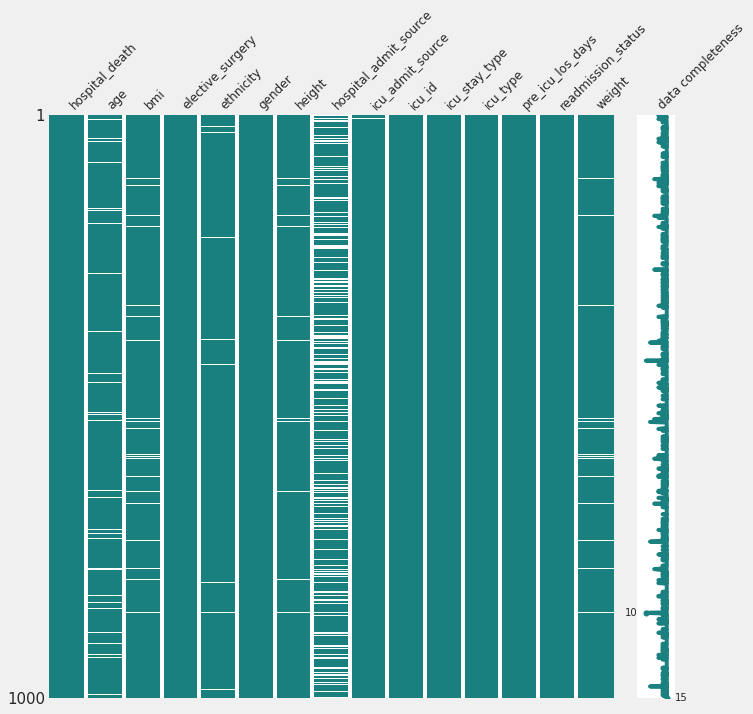

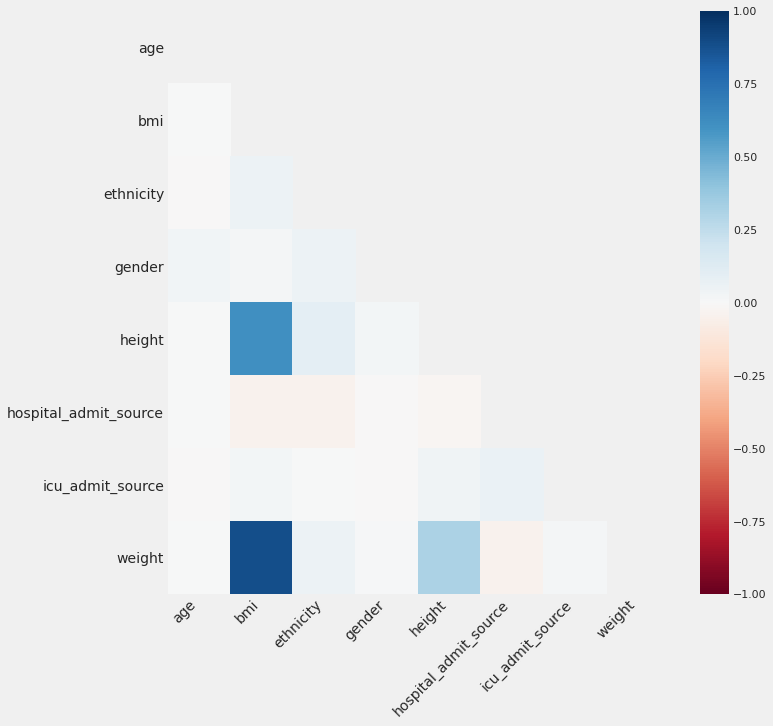

APACHE covariate


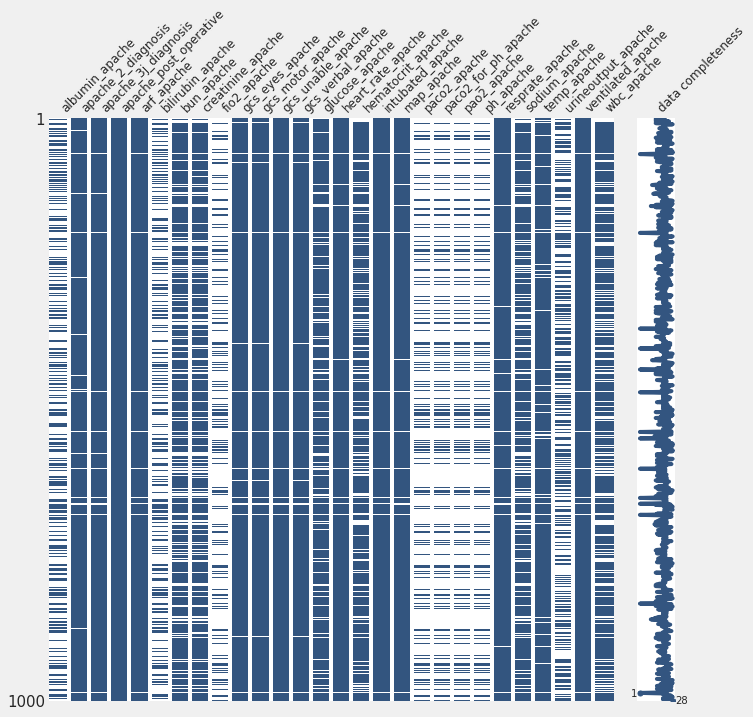

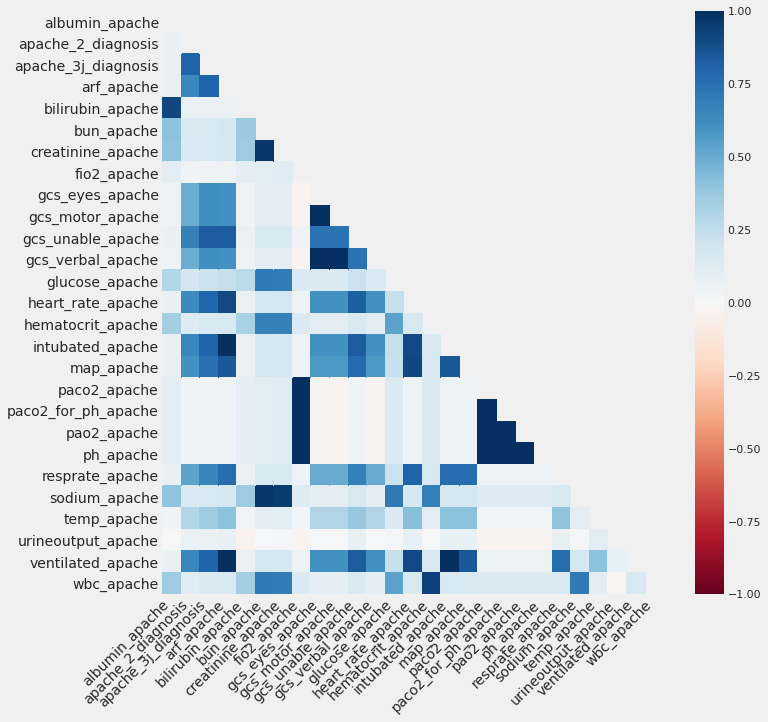

vitals


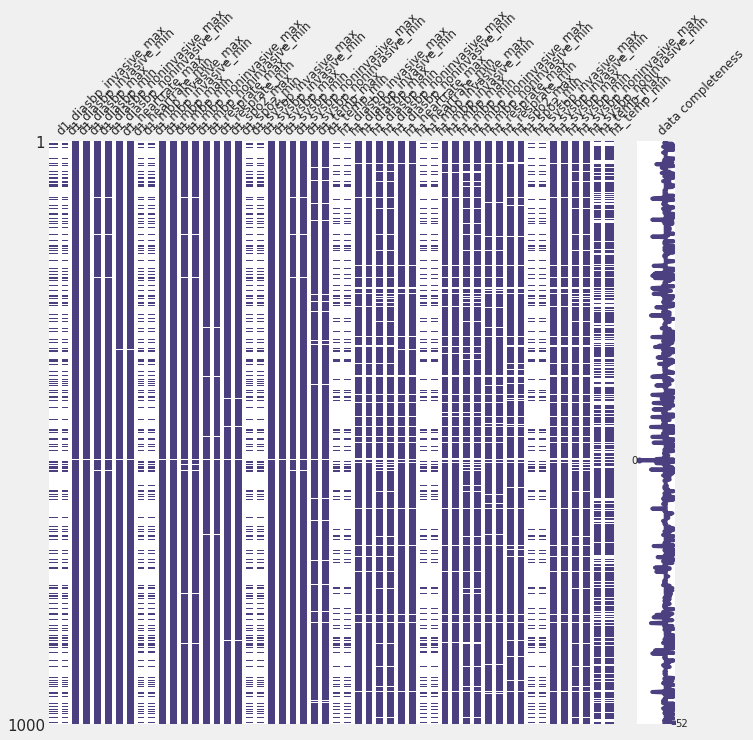

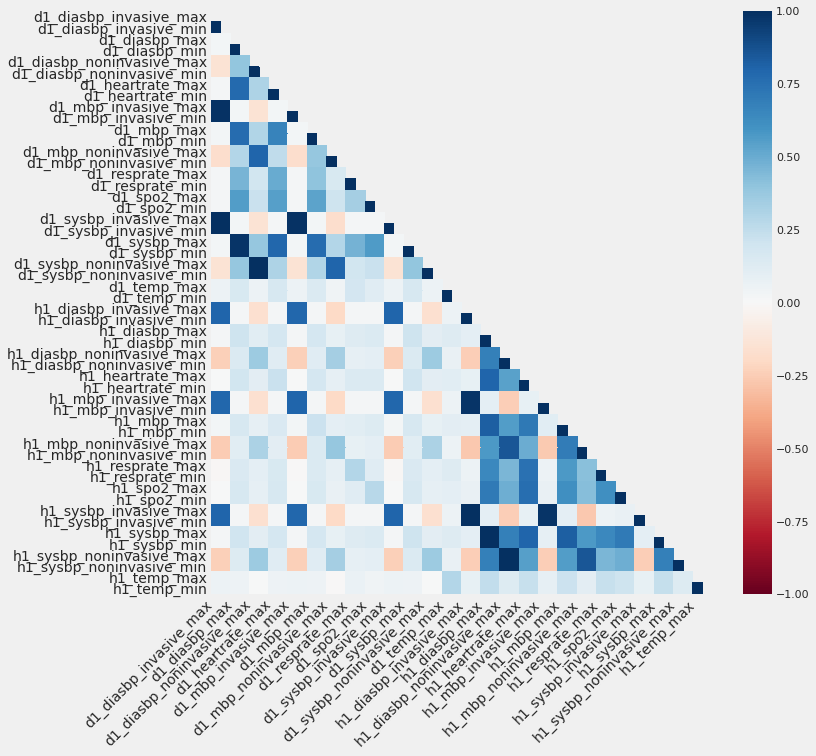

labs


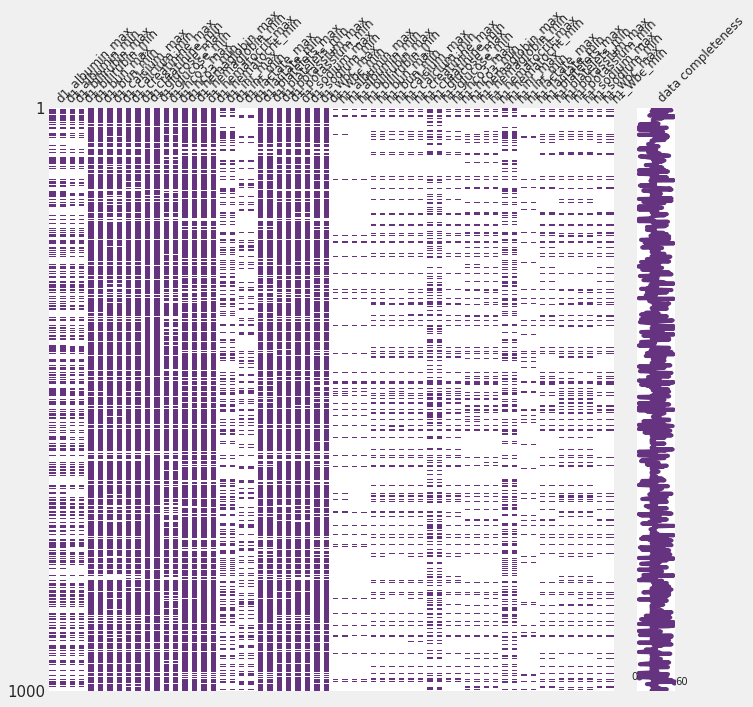

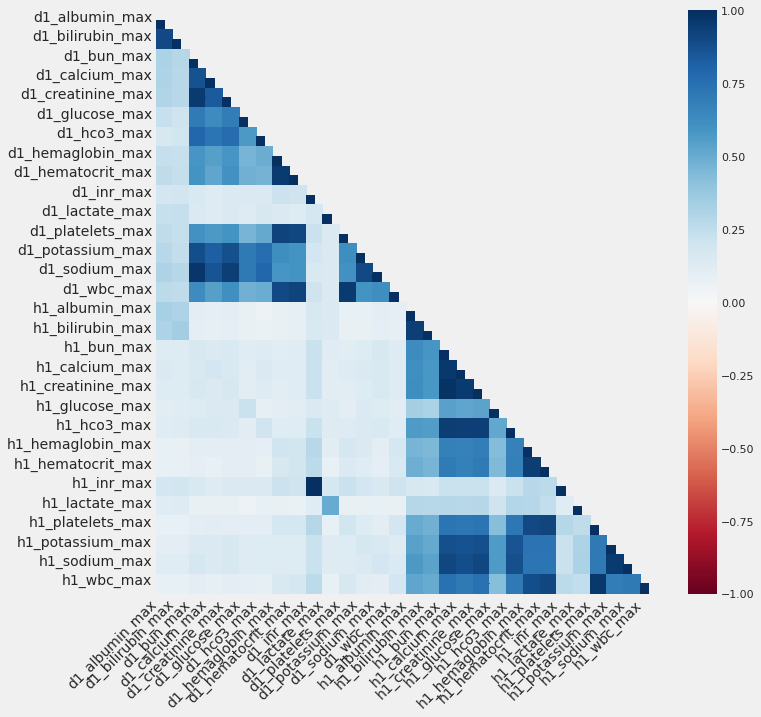

labs blood gas


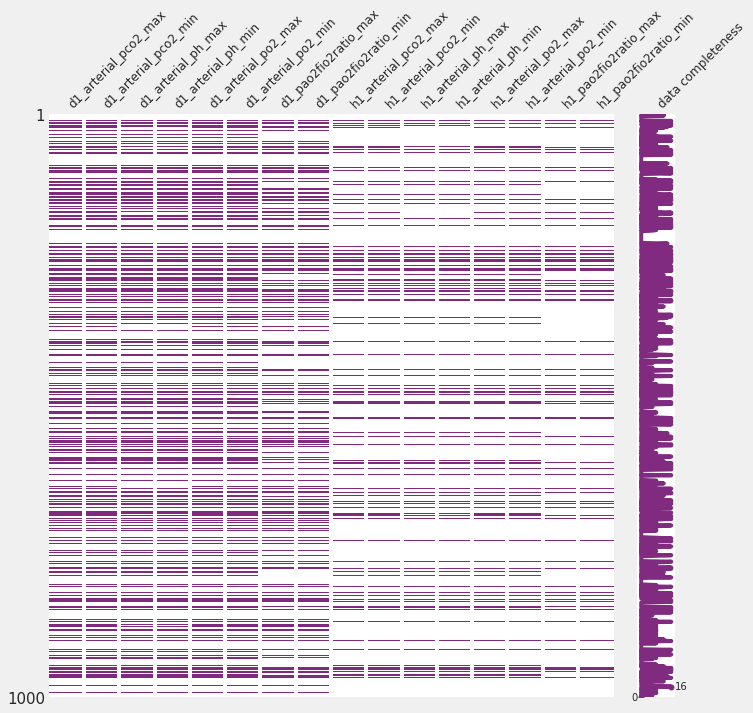

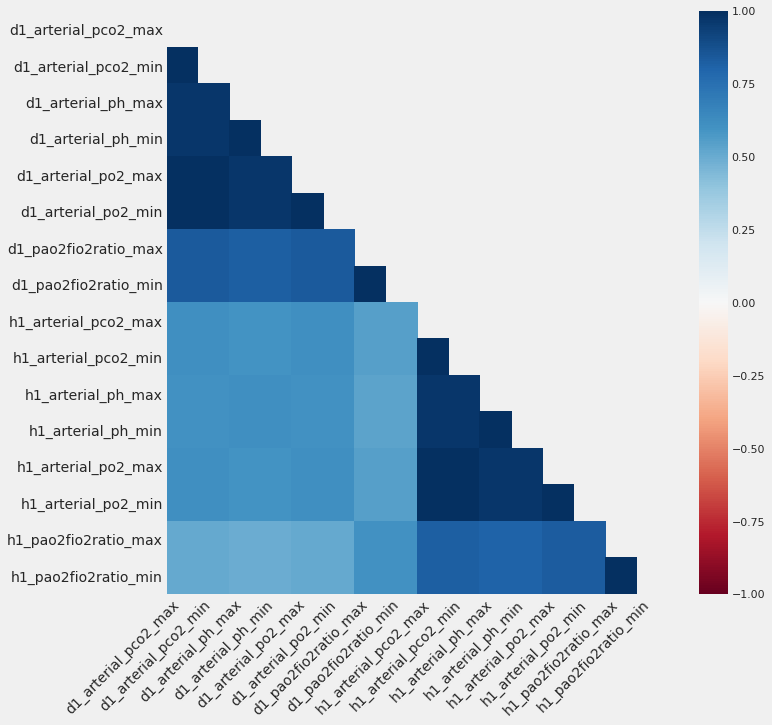

APACHE prediction


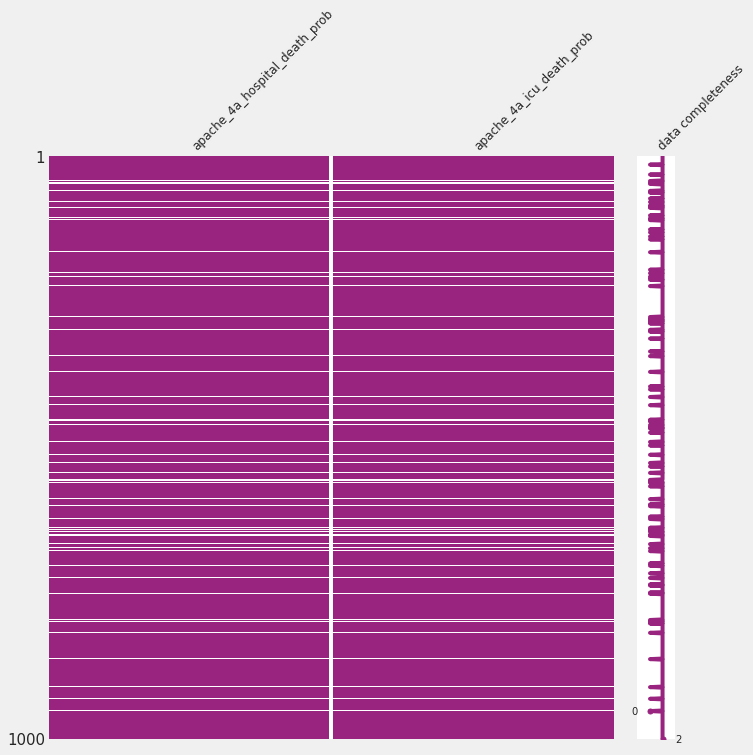

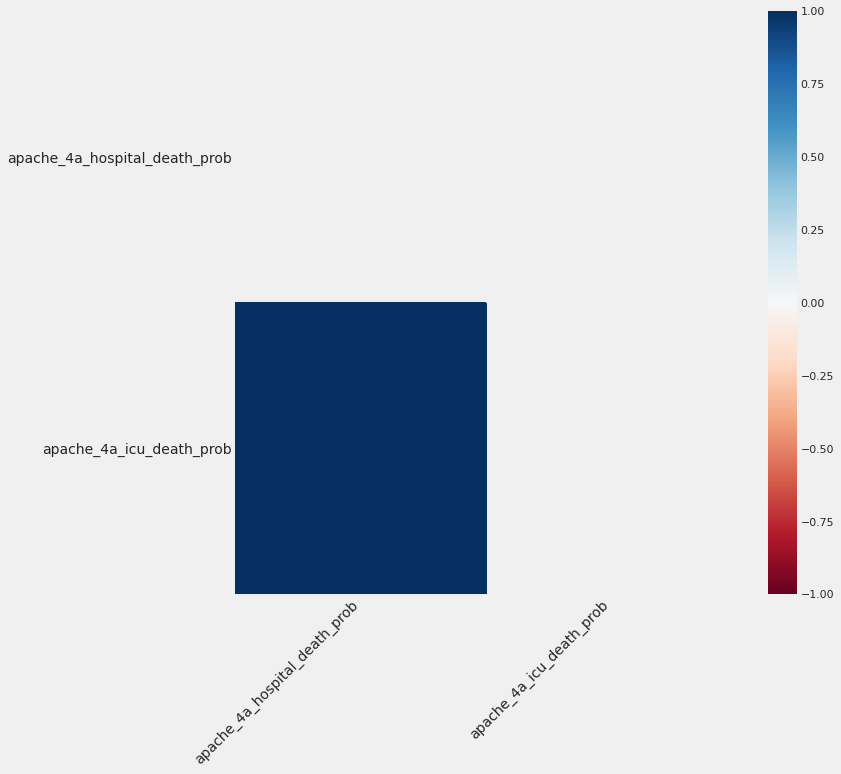

APACHE comorbidity


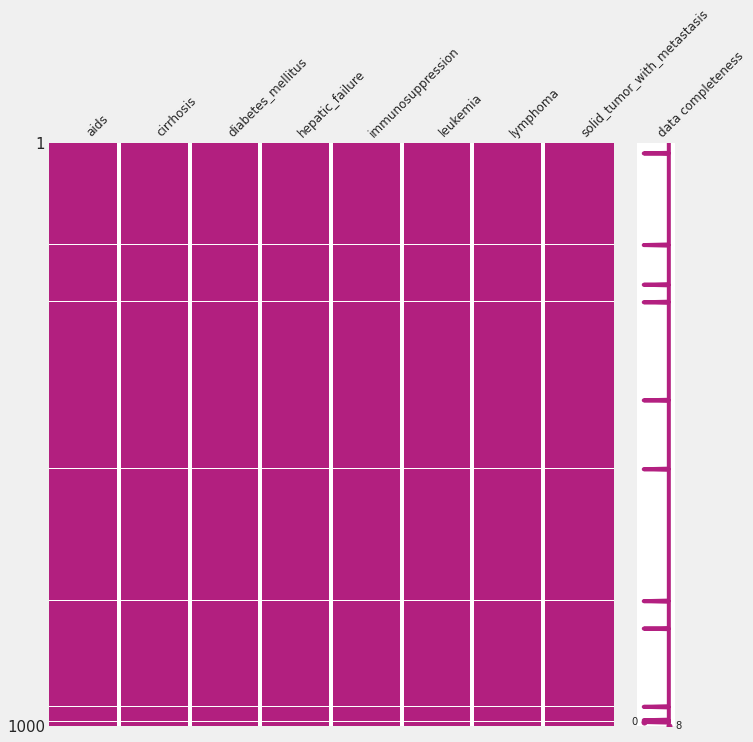

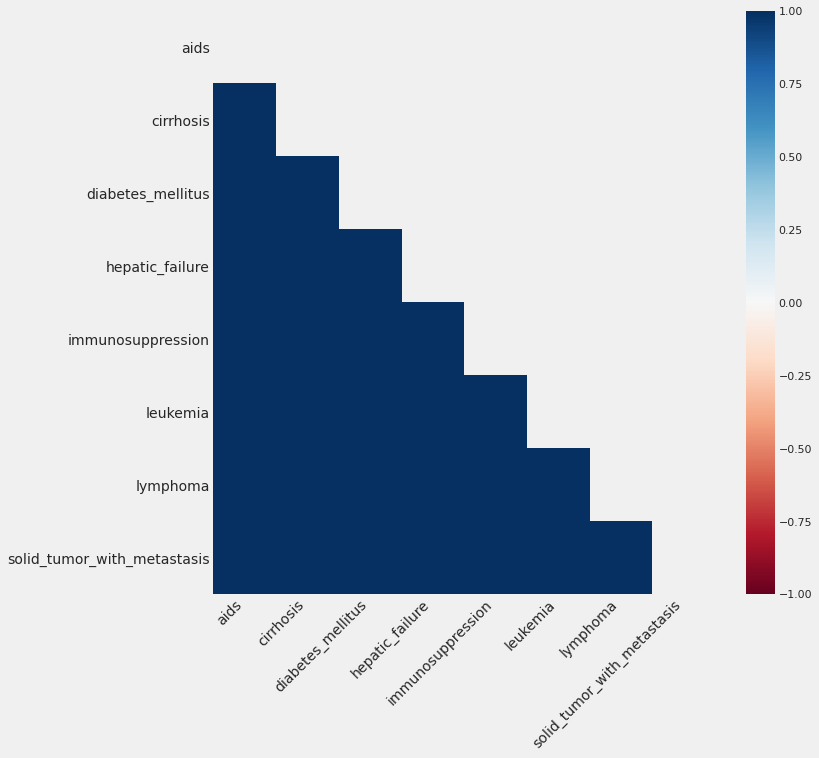

APACHE grouping


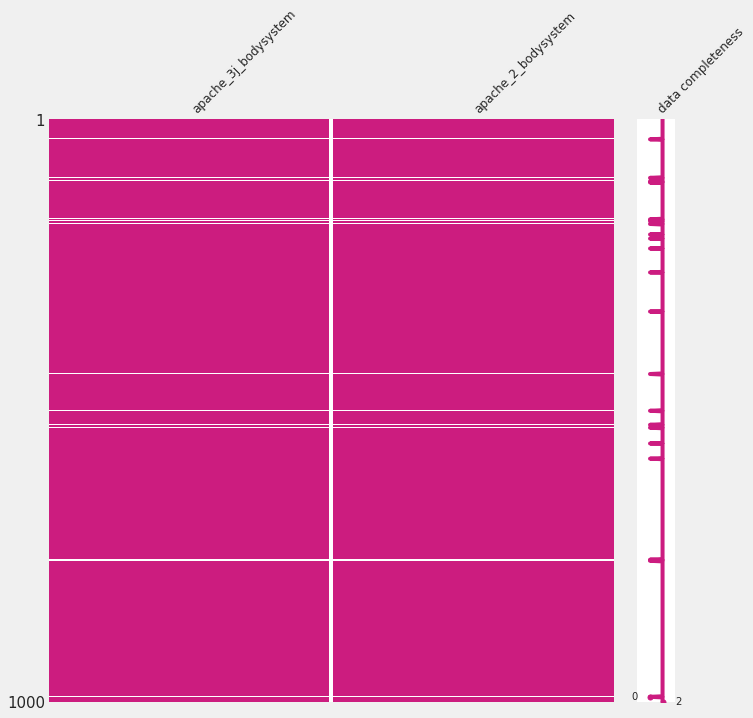

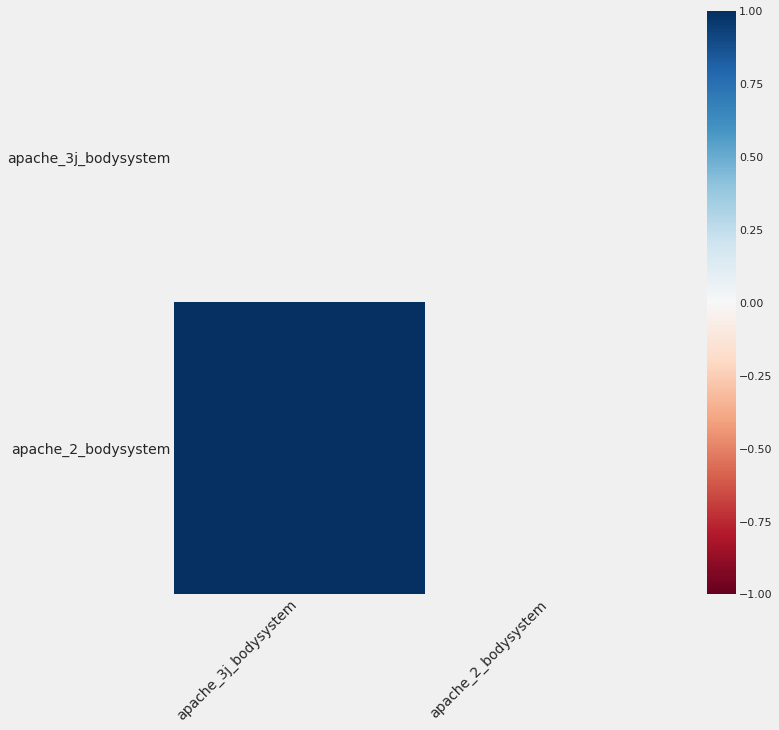

In [0]:
for color, variable in enumerate(dictionary['Category'].unique()):
  if variable not in ['GOSSIS example prediction','identifier']:
    print(variable)
    col_list = list(dictionary[dictionary['Category']==variable]['Variable Name'].values)
    col_list = [i for i in col_list if i in df.columns]
    if len(col_list) > 0:
        msno.matrix(df[col_list].sample(1000),figsize=(10, 10), labels=True, color=(color/10, 1/(color+1), 0.5),  fontsize=12)
        msno.heatmap(df[col_list],figsize=(10, 10),labels=False,fontsize=14)
        plt.show()

___
### IV.EXPLORATORY DATA ANALYSIS


___
### 1.Target Varaiable: `hospital_death` + Demographic

*Imbalanced dataset with 8.6% of death*
____

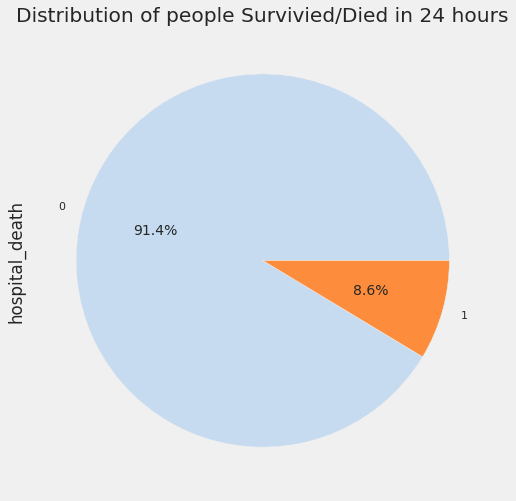

There are 8.63% of people who died in the dataset. Thus data is very imbalanced


In [0]:
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([3, 5]))

df['hospital_death'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%',colors=inner_colors)
plt.title('Distribution of people Survivied/Died in 24 hours')
plt.show()

print('There are {}% of people who died in the dataset. Thus data is very imbalanced'.format(np.round(df.loc[df.hospital_death==1,'hospital_death'].count()/df.hospital_death.count()*100,2)))

____
#### gender & ethnicity

*No significant difference between gender and ethnicity in terms of hospital_death*
___

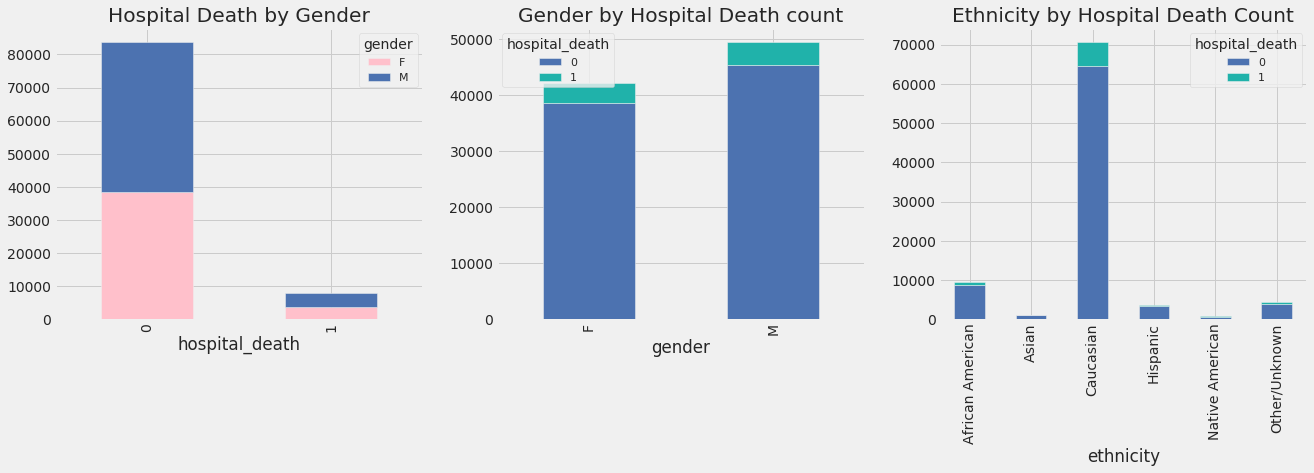

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

df.groupby(by = ['gender', 'hospital_death']
                    ).size().reset_index().pivot(columns='gender', 
                                                 index='hospital_death', 
                                                 values=0).plot(kind='bar', 
                                                                stacked=True, 
                                                                color =['pink','b'],
                                                                title = 'Hospital Death by Gender', 
                                                                fontsize = 14, ax = ax[0])

df.groupby(by = ['gender', 'hospital_death']
                    ).size().reset_index().pivot(columns='hospital_death', 
                                                 index='gender', 
                                                 values=0).plot(kind='bar', 
                                                                stacked=True, 
                                                                color =['b','lightseagreen'],
                                                                title = 'Gender by Hospital Death count', 
                                                                fontsize = 14, ax = ax[1])
plt.figsize=(12, 5)
df.groupby(by = ['ethnicity', 'hospital_death']
                    ).size().reset_index().pivot(columns='hospital_death', 
                                                 index='ethnicity', 
                                                 values=0).plot(kind='bar', 
                                                                stacked=True, 
                                                                color =['b','lightseagreen'],
                                                                title = 'Ethnicity by Hospital Death Count', 
                                                                fontsize = 14, ax = ax[2])                                               
plt.show()

In [0]:
# Gender vs. hospital_death
stats1 =df.groupby(['gender']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
stats1.sort_values('death_rate',ascending = False)

gender hospital_death        death_rate
                    sum  count           
0  F      3731           42219 8.8       
1  M      4176           49469 8.4

In [0]:
# Ethnictity vs. hospital_death
stats1 =df.groupby(['ethnicity']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
stats1.sort_values('death_rate',ascending = False)

ethnicity hospital_death        death_rate
                               sum  count           
3  Hispanic          376            3796  9.9       
4  Native American   70             788   8.9       
2  Caucasian         6168           70684 8.7       
1  Asian             93             1129  8.2       
5  Other/Unknown     353            4374  8.1       
0  African American  750            9547  7.9

___
#### age

*The higher of age (group 60 yrs above) - the higher probability of death*
___

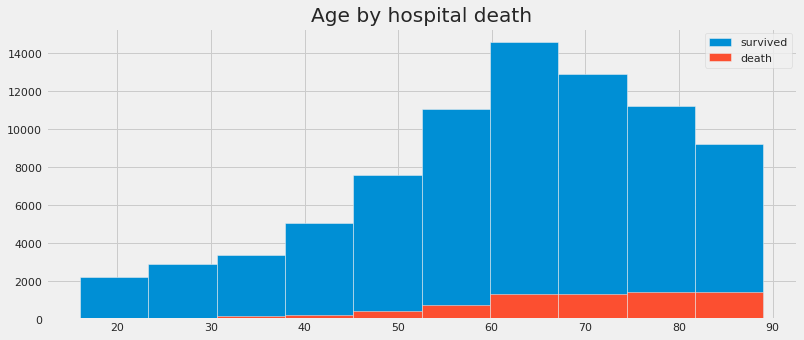

In [0]:
plt.figure(figsize=(12, 5))
df[df.hospital_death==0].age.hist(label="survived")
df[df.hospital_death==1].age.hist(label="death")
plt.legend(loc='upper right'); 
plt.title('Age by hospital death')                                              
plt.show()

___
#### elective_surgery

* elective_surgery: Whether the patient was admitted to the hospital for a scheduled surgery in advance, not emergency

*patients with no elective surgery have higher probabiity of death*
___

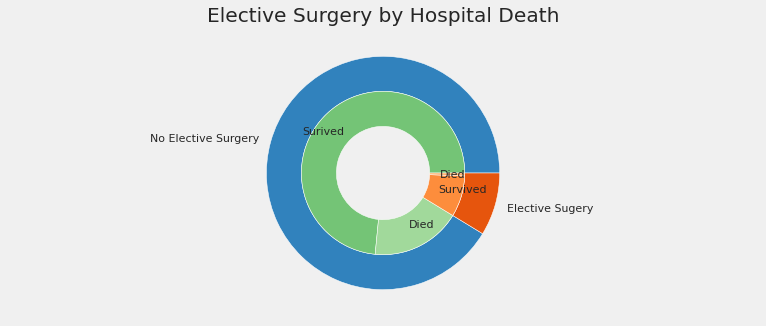

In [0]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('equal')
width = 0.3

cm = plt.get_cmap("tab20c")
cout = cm(np.arange(3)*4)
pie, _ = ax.pie(df.groupby('hospital_death')['patient_id'].sum().tolist(), radius=1, labels=['No Elective Surgery','Elective Sugery'], colors=cout)
plt.setp( pie, width=width, edgecolor='white')

cin = cm(np.array([9,10,5,6]))
labels = list(['Surived','Died','Survived','Died'])
pie2, _ = ax.pie(df.groupby(['hospital_death','elective_surgery'])['patient_id'].sum().tolist(), radius=1-width, labels=labels,
                                      labeldistance=0.7, colors=cin)
plt.setp( pie2, width=width, edgecolor='white')
plt.title('Elective Surgery by Hospital Death')
plt.show()

___
#### hospital_admit_source

Definition: The location of the patient prior to being admitted to the hospital


*Most of the patients were admitted to Emergency Department*

____



[Text(0, 0, 'Emergency Department'),
 Text(0, 0, 'Operating Room'),
 Text(0, 0, 'Floor'),
 Text(0, 0, 'Direct Admit'),
 Text(0, 0, 'Recovery Room'),
 Text(0, 0, 'Acute Care/Floor'),
 Text(0, 0, 'Step-Down Unit (SDU)'),
 Text(0, 0, 'Other Hospital'),
 Text(0, 0, 'PACU'),
 Text(0, 0, 'Other ICU'),
 Text(0, 0, 'ICU to SDU'),
 Text(0, 0, 'Chest Pain Center'),
 Text(0, 0, 'ICU'),
 Text(0, 0, 'Observation'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'nan')]

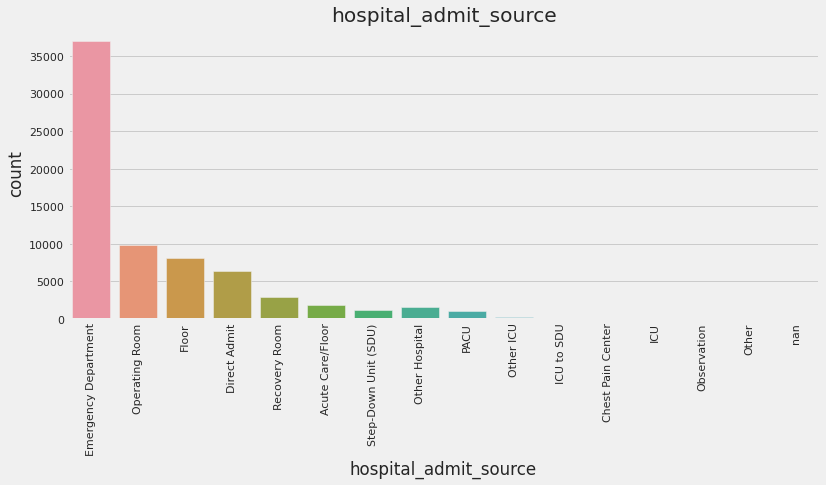

In [0]:
ord = ['Emergency Department','Operating Room','Floor','Direct Admit','Recovery Room','Acute Care/Floor',
       'Step-Down Unit (SDU)','Other Hospital','PACU','Other ICU','ICU to SDU','Chest Pain Center','ICU',
       'Observation','Other','nan']

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(x = 'hospital_admit_source', data = df,order=ord)
ax.set_title('hospital_admit_source')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

___
__hospital_death by hospital admit source__

In [0]:
stats1 =df.groupby(['hospital_admit_source']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
stats1.sort_values('death_rate',ascending = False,inplace=True)
stats1 = stats1.droplevel(0, axis=1)

stats1 = pd.DataFrame(stats1.values,columns = ['hospital_admit_source','sum','count','death_rate'])
stats1.drop('sum',axis=1,inplace=True)
stats1

,hospital_admit_source,count,death_rate
0,Step-Down Unit (SDU),1131,18.8
1,Other ICU,233,15.0
2,Other,7,14.3
3,Floor,8055,13.9
4,Other Hospital,1641,13.5
5,Acute Care/Floor,1910,10.5
6,Direct Admit,6441,10.3
7,Emergency Department,36962,8.7
8,ICU,35,8.6
9,ICU to SDU,45,6.7


____
#### icu related features:

* icu_admit_source: The location of the patient prior to being admitted to the unit

* icu_stay_type: readmit, transfer, admit

* icu_type: A classification which indicates the type of care the unit is capable of providing 

[Text(0, 0, 'Accident & Emergency'),
 Text(0, 0, 'Operating Room / Recovery'),
 Text(0, 0, 'Floor'),
 Text(0, 0, 'Other ICU')]

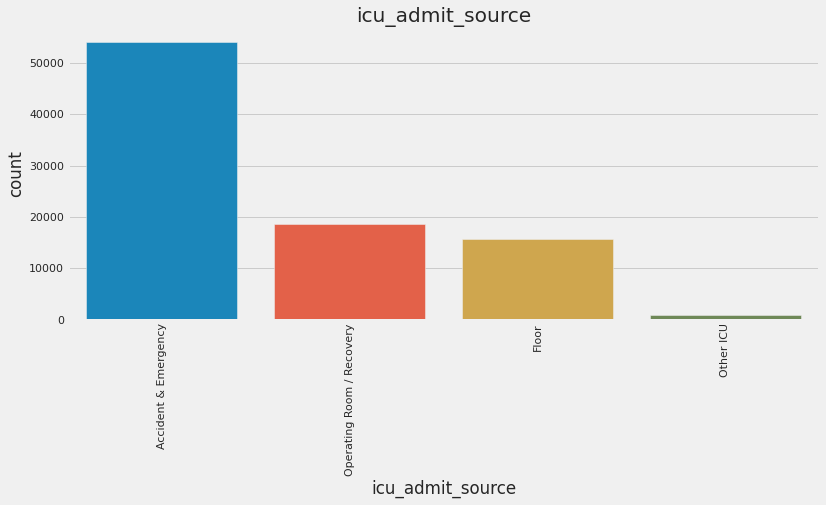

In [0]:
ord = ['Accident & Emergency','Operating Room / Recovery','Floor','Other ICU']

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(x = 'icu_admit_source', data = df, order=ord)
ax.set_title('icu_admit_source')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

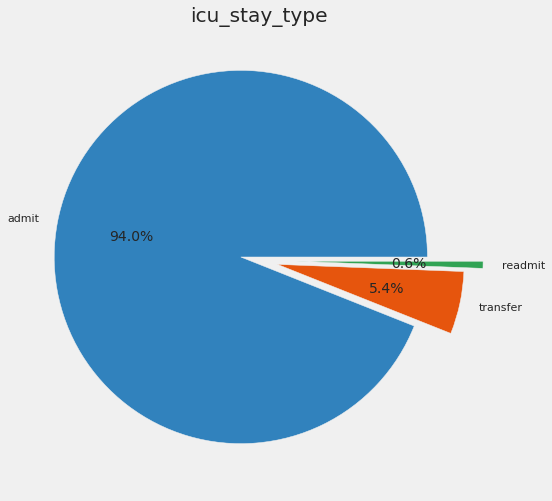

In [0]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)

df['icu_stay_type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.2], autopct='%1.1f%%',colors=outer_colors)
plt.title('icu_stay_type')
plt.ylabel("")
plt.show()

[Text(0, 0, 'Med-Surg ICU'),
 Text(0, 0, 'Neuro ICU'),
 Text(0, 0, 'MICU'),
 Text(0, 0, 'CCU-CTICU'),
 Text(0, 0, 'SICU'),
 Text(0, 0, 'Cardiac ICU'),
 Text(0, 0, 'CSICU'),
 Text(0, 0, 'CTICU')]

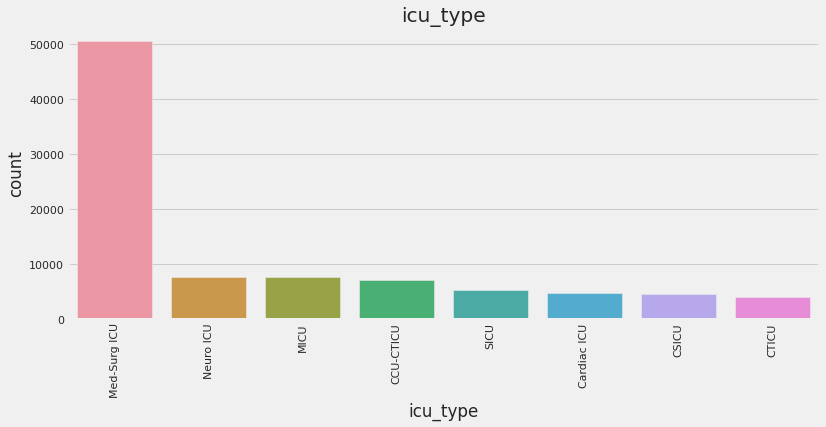

In [0]:
ord = ['Med-Surg ICU','Neuro ICU','MICU','CCU-CTICU','SICU','Cardiac ICU','CSICU','CTICU']
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(x = 'icu_type', data = df, order= ord)
ax.set_title('icu_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

____
__hospital_death vs. icu_admit_souce__

In [0]:
stats1 =df.groupby(['icu_admit_source']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
stats1.sort_values('death_rate',ascending = False,inplace=True)
stats1 = stats1.droplevel(0, axis=1)

stats1 = pd.DataFrame(stats1.values,columns = ['icu_admit_source','sum','count','death_rate'])
stats1.drop('sum',axis=1,inplace=True)
stats1

,icu_admit_source,count,death_rate
0,Other ICU,859,14.4
1,Other Hospital,2358,13.4
2,Floor,15611,13.4
3,Accident & Emergency,54060,8.6
4,Operating Room / Recovery,18713,3.7


____
#### pre_icu_los

* pre_icu_los_days: The length of stay of the patient between hospital admission and unit admission (days)

**PROBLEM**
- Negative length of stay day! This can not be happened

**SOLUTION**
- Need to replace negative value:
    - either by 0 or 
    - add up negative value to positive value. 

Check length of stay vs. death rate bt day <0, day[0-10], day[10...]
___

In [0]:
df.groupby('hospital_death').pre_icu_los_days.describe()

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,83798.0,0.8,2.4,-24.9,0.0,0.1,0.4,159.1
1,7915.0,1.3,3.6,-13.8,0.0,0.1,0.8,84.4


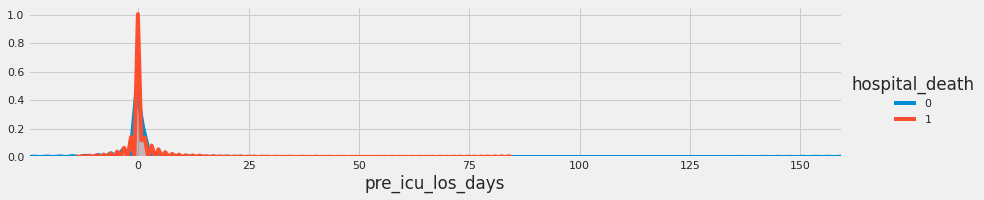

In [0]:
plot_distribution(df, var="pre_icu_los_days", target="hospital_death")

___
#### apache_3j_diagnosis | bodysystem

Patients with sepsis  rorespiratory disease have higher prob of death
____

In [0]:
# Number of unique sub-diseases
print("Number of unique sub-diseases_apache3j:", df.apache_3j_diagnosis.nunique())
print("Number of unique sub-diseases_apache2:",df.apache_2_diagnosis.nunique())

Number of unique sub-diseases_apache3j: 399
Number of unique sub-diseases_apache2: 44


___
### 2.APACHE prediction

- `apache_4a_hospital_death_prob` and `apache_4a_icu_death_prob` are 100% correlated 

*Even people with less than 0.2% predicted probability of death, they still actually died*

**QUESTIONS:** 

how we improve this prediction?
our model prediction probability should be compared against these probabilities
___

In [0]:
cols = ['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'hospital_death']
apache_prediction = df[cols]

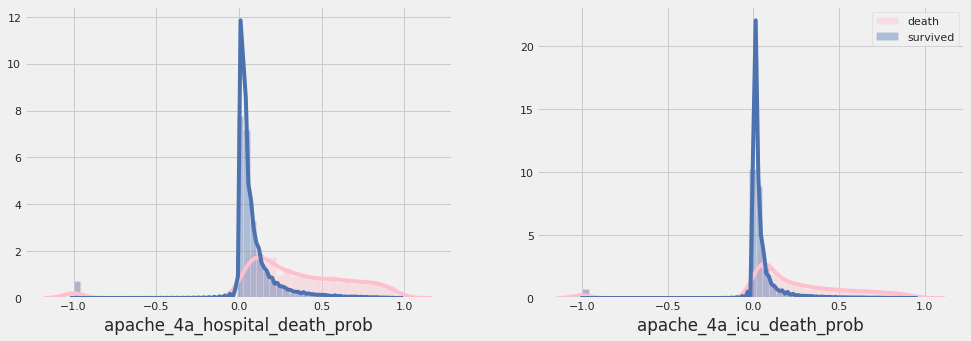

In [0]:
# Plot distribution of apache_prediction_probability by both icu and hospital
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(apache_prediction[apache_prediction['hospital_death']==1].apache_4a_hospital_death_prob, hist=True, kde=True, ax = ax[0], color ='pink',  label='death')
sns.distplot(apache_prediction[apache_prediction['hospital_death']==0].apache_4a_hospital_death_prob, hist=True, kde=True, ax = ax[0], color='b',  label='survived')
sns.distplot(apache_prediction[apache_prediction['hospital_death']==1].apache_4a_icu_death_prob, hist=True, kde=True,ax = ax[1],color ='pink',  label='death')
sns.distplot(apache_prediction[apache_prediction['hospital_death']==0].apache_4a_icu_death_prob, hist=True, kde=True,ax = ax[1], color='b',  label='survived')
plt.legend();

In [0]:
# Check correlation between icu and hospital (apache_4a)
from scipy.stats import pearsonr
corr, _ = pearsonr(apache_prediction.apache_4a_icu_death_prob.notnull(), apache_prediction.apache_4a_hospital_death_prob.notnull())
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


In [0]:
# Missing values for these two features
print('missing%_apache_4a_icu_death_prob: ',round((apache_prediction.apache_4a_icu_death_prob.isnull().sum()/apache_prediction.shape[0])*100,2))
print('missing%_apache_4a_hospital_death_prob: ',round((apache_prediction.apache_4a_hospital_death_prob.isnull().sum()/apache_prediction.shape[0])*100,2))

missing%_apache_4a_icu_death_prob:  8.67
missing%_apache_4a_hospital_death_prob:  8.67


In [0]:
missing_icu_prob_death = df[(df.apache_4a_icu_death_prob.isnull()) & (df['hospital_death']==1)]
missing_icu_prob_survived = df[(df.apache_4a_icu_death_prob.isnull()) & (df['hospital_death']==0)]

print('death:',missing_icu_prob_death.shape)
print('survived:',missing_icu_prob_survived.shape)

death: (552, 186)
survived: (7395, 186)


In [0]:
stats1 =df.groupby(['apache_3j_bodysystem']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
stats1 = stats1.droplevel(0, axis=1)

stats1 = pd.DataFrame(stats1.values,columns = ['apache_3j_bodysystem','sum','count','death_rate'])
stats1.drop('sum',axis=1,inplace=True)
stats1.sort_values(by='count',ascending=False,inplace=True)
stats1.index = stats1.apache_3j_bodysystem
stats1.drop('apache_3j_bodysystem',axis=1,inplace=True)
stats1

,count,death_rate
apache_3j_bodysystem,,
Cardiovascular,29999,8.0
Neurological,11896,7.9
Sepsis,11740,15.8
Respiratory,11609,11.2
Gastrointestinal,9026,7.4
Metabolic,7650,1.5
Trauma,3842,6.7
Genitourinary,2172,6.2
Musculoskeletal/Skin,1166,4.7


___
### 3.APACHE comorbidity

KEY FINDINDS:
- 31% of patients had at least 1 chronic disease. Diabetes accounted for the highest proportion, followed by hepatic_failure

- Patients with 1 of the chronic diease (aids, cirrhosis, hepatic_failure, luekemia, lymphoma, solid_tumor,immunosuppression) are likely to have higher chance of death as compared to those without such diseases. However, it is not the case for diabetes_melitus ( equal probability of death)

- The result suggest no correlation between the number of chronic diseases and hospital_death
___

Chronic Health Evaluation: APACHE II | III-J

https://www.anzics.com.au/wp-content/uploads/2018/08/ANZICS-APD-Data-Dictionary.pdf

_Evidence of organ insufficiency or immunocompromised state PRIOR to the hospital admission._

APACHE II:
Evidence/existence of the **6 co-morbidities** listed below should be recorded at the time of admission to hospital AND must conform 6 criterias (refer link for more info)

APACHE III-J:
Evidence/existence of the **7 co-morbidities** listed below should be recorded at the time of the hospital admission AND must conform to 7 criterias (refer link for more info)

In [0]:
comorbidity_cols = ['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

In [0]:
comor = comorbidity_cols.copy()
comor.extend(['hospital_death'])

X=[]
for i in comorbidity_cols:
    X.append(df[[i]].sum(axis =0)[0])
    print(i + ':', df[[i]].sum(axis =0)[0])
print('-----'*15)
print('% of having at least 1 chronic disease:', round(sum(X)/df.shape[0]*100))

aids: 78.0
cirrhosis: 1428.0
diabetes_mellitus: 20492.0
hepatic_failure: 1182.0
immunosuppression: 2381.0
leukemia: 643.0
lymphoma: 376.0
solid_tumor_with_metastasis: 1878.0
---------------------------------------------------------------------------
% of having at least 1 chronic disease: 31.0


Pearsons correlation bt hospital_death & number of chronic diseases: 0.026
---------------------------------------------------------------------------


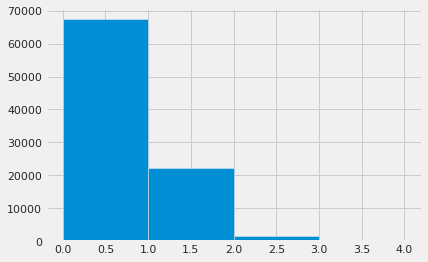

In [0]:
df['num_disease']= df.iloc[:,176:183].sum(axis =1)
df['num_disease'].hist(bins =4)
corr, _ = pearsonr(df.hospital_death, df.num_disease)
print('Pearsons correlation bt hospital_death & number of chronic diseases: %.3f' % corr)
print('-----'*15)

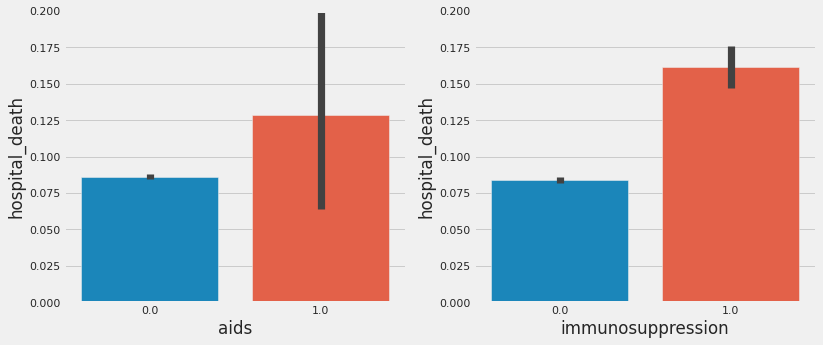

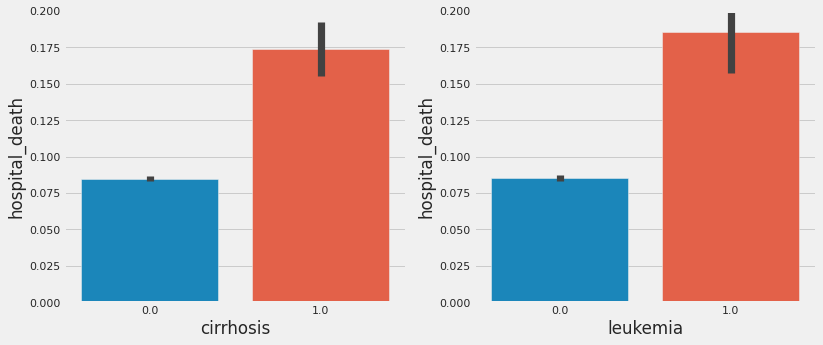

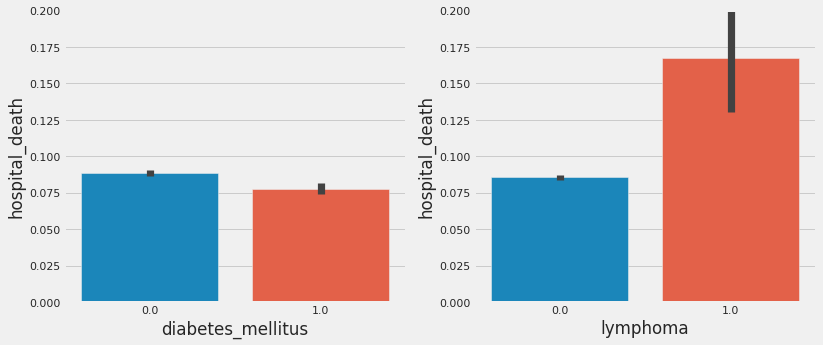

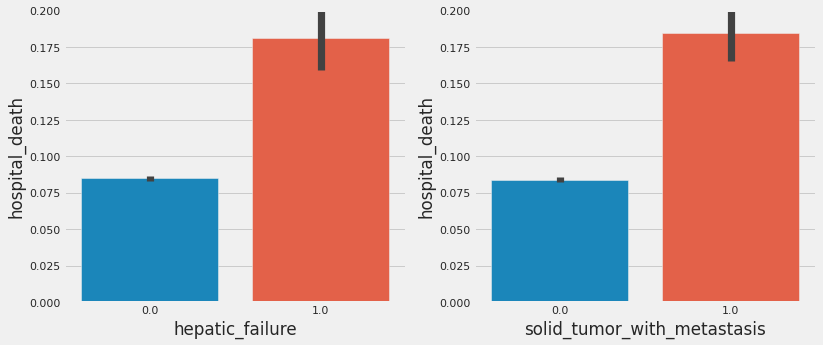

In [0]:
for (i,j) in zip(comorbidity_cols[:4], comorbidity_cols[4:]):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(x=i, y="hospital_death", data=df, ax=ax[0]).set_ylim([0, 0.2])
    sns.barplot(x=j, y="hospital_death", data=df, ax=ax[1]).set_ylim([0, 0.2])

___
### 4.APACHE grouping

Decide to choose between these two features: 
- apache_2_bodysystem: 2 variables: undefined diagnosis (not appear in apache_3j_bbodysystem)
- apache_3j_bodysystem: New variable: `Sepsis`. 


*__Sepsis__ is a potentially life-threatening condition caused by the body's response to an infection. The body normally releases chemicals into the bloodstream to fight an infection. Sepsis occurs when the body's response to these chemicals is out of balance, triggering changes that can damage multiple organ systems.
Diseases or conditions caused: Shock (circulatory)*
___

In [0]:
# Unique varaibles by apache_2_bodysystem and apache_3j_bodysystem
print('apache_3j_bodysystem:',len(df.apache_3j_bodysystem.unique()))
print('apache_2_bodysystem:',len(df.apache_2_bodysystem.unique()))

apache_3j_bodysystem: 12
apache_2_bodysystem: 11


In [0]:
apache_3j_bodysystem= df.groupby('apache_3j_bodysystem')['hospital_death'].count().reset_index().sort_values('hospital_death', ascending = False)
apache_3j_bodysystem.columns =["apache_3j_bodysystem", 'Count']
apache_3j_bodysystem['Percentage'] = round((apache_3j_bodysystem['Count']/apache_3j_bodysystem.Count.sum())*100,2)
apache_3j_bodysystem.sort_values('Percentage', ascending=False)

,apache_3j_bodysystem,Count,Percentage
0,Cardiovascular,29999,33.3
7,Neurological,11896,13.2
9,Sepsis,11740,13.0
8,Respiratory,11609,12.9
1,Gastrointestinal,9026,10.0
5,Metabolic,7650,8.5
10,Trauma,3842,4.3
2,Genitourinary,2172,2.4
6,Musculoskeletal/Skin,1166,1.3
4,Hematological,638,0.7


In [0]:
apache_2_bodysystem = df.groupby('apache_2_bodysystem')['hospital_death'].count().reset_index().sort_values('hospital_death', ascending = False)
apache_2_bodysystem.columns =["apache_2_bodysystem", 'Count']
apache_2_bodysystem['Percentage'] = round((apache_2_bodysystem['Count']/apache_2_bodysystem.Count.sum())*100,2)
apache_2_bodysystem.sort_values('Percentage', ascending=False)

,apache_2_bodysystem,Count,Percentage
0,Cardiovascular,38816,43.1
4,Neurologic,11896,13.2
6,Respiratory,11609,12.9
1,Gastrointestinal,9026,10.0
3,Metabolic,7650,8.5
7,Trauma,3842,4.3
9,Undefined diagnoses,3768,4.2
5,Renal/Genitourinary,2460,2.7
2,Haematologic,638,0.7
8,Undefined Diagnoses,346,0.4


In [0]:
# 'Unknown diagnosis' in APACHE II were diagnosed with 'Cardiovascular' and 'Musculoskeletal/Skin' in APACHE III - 4114 cases
print(df[(df['apache_2_bodysystem']== 'Undefined Diagnoses') | (df['apache_2_bodysystem']== 'Undefined diagnoses')].apache_3j_bodysystem.unique())
print(df[(df['apache_2_bodysystem']== 'Undefined Diagnoses') | (df['apache_2_bodysystem']== 'Undefined diagnoses')].shape)

['Cardiovascular' 'Musculoskeletal/Skin']
(4114, 186)


In [0]:
# New 'Sepsis' category in APACHE III is coming from 'Cardiovascular' in APACHE II, 11740 cases
print(df[(df['apache_3j_bodysystem']== 'Sepsis')].apache_2_bodysystem.unique())
print(df[(df['apache_3j_bodysystem']== 'Sepsis')].apache_2_bodysystem.shape)

['Cardiovascular']
(11740,)


(0, 0.16)

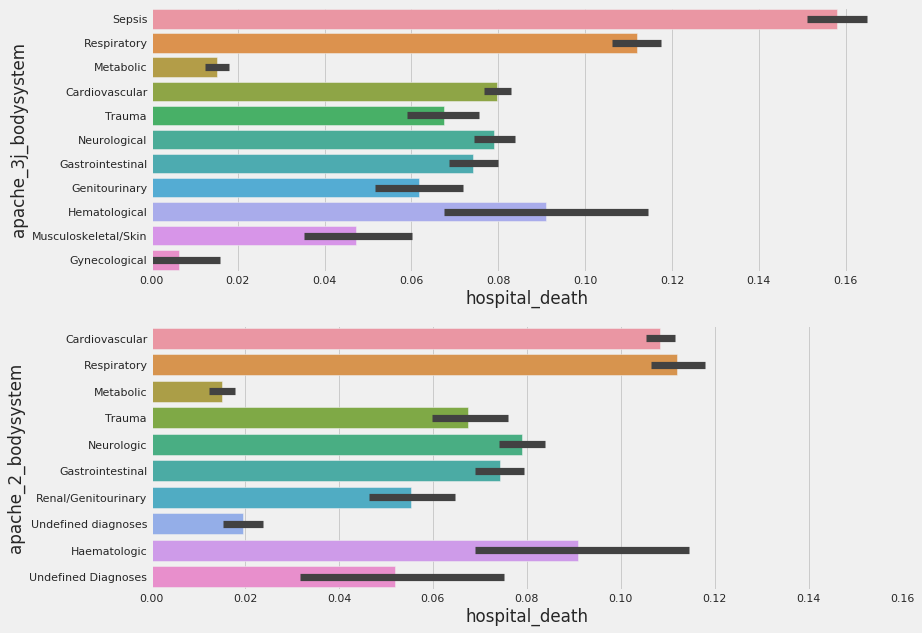

In [0]:
# Hospital_death vs. apache_3j_bodysystem and apache_2_bodysystem
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(y="apache_3j_bodysystem", x="hospital_death" , data=df, ax= ax[0])
sns.barplot(y="apache_2_bodysystem", x="hospital_death" , data=df, ax= ax[1])
plt.xlim(0,0.16)

In [0]:
stats1 =df.groupby(['apache_3j_bodysystem']).agg({'hospital_death':['sum','count']}).reset_index()
stats1['death_rate']=np.round(stats1['hospital_death']['sum']/stats1['hospital_death']['count']*100,2)
#stats1.sort_values('count',ascending = False,inplace=True)
stats1 = stats1.droplevel(0, axis=1)

stats1 = pd.DataFrame(stats1.values,columns = ['apache_3j_bodysystem','sum','count','death_rate'])
stats1.drop('sum',axis=1,inplace=True)
stats1.sort_values(by='count',ascending=False,inplace=True)
stats1.index = stats1.apache_3j_bodysystem
stats1.drop('apache_3j_bodysystem',axis=1,inplace=True)
stats1

,count,death_rate
apache_3j_bodysystem,,
Cardiovascular,29999,8.0
Neurological,11896,7.9
Sepsis,11740,15.8
Respiratory,11609,11.2
Gastrointestinal,9026,7.4
Metabolic,7650,1.5
Trauma,3842,6.7
Genitourinary,2172,6.2
Musculoskeletal/Skin,1166,4.7


In [0]:
df.apache_3j_bodysystem.isnull().sum()

1662

___
### V.MIN-MAX problem

There are many features that have min > max. Will deal with it in notebook 3: impute & 4:binning

Two patterns:
 - Consitent values across patients
 - Values are different by patients 
___

In [0]:
min_max_column =[
                ('d1_diasbp_invasive_max','d1_diasbp_invasive_min'),
                ('d1_diasbp_max','d1_diasbp_min'),
                ('d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min'),
                ('d1_heartrate_max','d1_heartrate_min'),
                ('d1_mbp_invasive_max','d1_mbp_invasive_min'),
                ('d1_mbp_max','d1_mbp_min'),
                ('d1_mbp_noninvasive_max','d1_mbp_noninvasive_min'),
                ('d1_resprate_max','d1_resprate_min'),
                ('d1_spo2_max','d1_spo2_min'),
                ('d1_sysbp_invasive_max','d1_sysbp_invasive_min'),
                ('d1_sysbp_max','d1_sysbp_min'),
                ('d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min'),
                ('d1_temp_max','d1_temp_min'),
                ('d1_albumin_max','d1_albumin_min'),
                ('d1_bilirubin_max','d1_bilirubin_min'),
                ('d1_bun_max','d1_bun_min'),
                ('d1_calcium_max','d1_calcium_min'),
                ('d1_creatinine_max','d1_creatinine_min')]

In [0]:
# Print out all features that have max < min and the id to check pattern
min_max_prob = []
for i in min_max_column:
  variables = i
  print(variables[0],variables[1])
  print(df[variables[0]].min(),df[variables[0]].max())
  print(df[variables[1]].min(),df[variables[1]].max())
  display(df.loc[df[variables[0]]<df[variables[1]],[variables[0],variables[1]]])
  min_max_prob +=df.loc[df[variables[0]]<df[variables[1]],'patient_id'].tolist()

d1_diasbp_invasive_max d1_diasbp_invasive_min
37.0 181.0
5.0 89.0


,d1_diasbp_invasive_max,d1_diasbp_invasive_min
49973,37.0,43.0
68413,37.0,58.0
81084,37.0,42.0
89270,37.0,58.0


d1_diasbp_max d1_diasbp_min
46.0 165.0
13.0 90.0


,d1_diasbp_max,d1_diasbp_min
32353,46.0,57.0
35087,46.0,63.0
37558,46.0,53.0
43699,46.0,55.0
48441,46.0,52.0
55090,46.0,55.0
55189,46.0,77.0
56924,46.0,50.0
61651,46.0,51.0
61705,46.0,82.0


d1_diasbp_noninvasive_max d1_diasbp_noninvasive_min
46.0 165.0
13.0 90.0


,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min
32353,46.0,57.0
35087,46.0,63.0
43699,46.0,55.0
48441,46.0,52.0
55090,46.0,55.0
55189,46.0,77.0
56924,46.0,50.0
61651,46.0,51.0
61705,46.0,82.0
84811,46.0,58.0


d1_heartrate_max d1_heartrate_min
58.0 177.0
0.0 175.0


,d1_heartrate_max,d1_heartrate_min
10857,58.0,80.0
18989,58.0,68.0
20228,58.0,60.0
33490,58.0,64.0
42163,58.0,62.0
43422,58.0,90.0
49407,58.0,76.0
49813,58.0,105.0
49838,58.0,114.0
54399,58.0,62.0


d1_mbp_invasive_max d1_mbp_invasive_min
38.0 322.0
2.0 119.0


,d1_mbp_invasive_max,d1_mbp_invasive_min
195,38.0,66.0
7543,38.0,80.0
24706,38.0,62.0
55103,38.0,79.0
58334,38.0,39.0


d1_mbp_max d1_mbp_min
60.0 184.0
22.0 112.0


,d1_mbp_max,d1_mbp_min
3422,60.0,103.0
5068,60.0,72.0
13489,60.0,73.0
24570,60.0,85.0
32110,60.0,68.0
42734,60.0,67.0
51564,60.0,85.0
91601,60.0,69.0
91689,60.0,77.0


d1_mbp_noninvasive_max d1_mbp_noninvasive_min
60.0 181.0
22.0 112.0


,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min
405,60.0,86.0
3501,60.0,92.0
5444,60.0,70.0
5869,60.0,82.0
11941,60.0,89.0
12666,60.0,95.0
24229,60.0,69.0
32353,60.0,63.0
33582,60.0,102.0
33813,60.0,75.0


d1_resprate_max d1_resprate_min
14.0 92.0
0.0 100.0


,d1_resprate_max,d1_resprate_min
52067,14.0,20.0
71776,92.0,96.0
72737,14.0,25.0
73863,92.0,100.0
81314,14.0,18.0


d1_spo2_max d1_spo2_min
0.0 100.0
0.0 100.0


,d1_spo2_max,d1_spo2_min


d1_sysbp_invasive_max d1_sysbp_invasive_min
71.0 295.0
10.0 172.0


,d1_sysbp_invasive_max,d1_sysbp_invasive_min
32148,71.0,104.0
39989,71.0,79.0
50143,71.0,104.0
53654,71.0,96.0
69902,71.0,123.0
88531,71.0,136.0
89141,71.0,93.0
89718,71.0,93.0


d1_sysbp_max d1_sysbp_min
90.0 232.0
41.0 160.0


,d1_sysbp_max,d1_sysbp_min
2384,90.0,100.0
5979,90.0,100.0
6237,90.0,101.0
6250,90.0,148.0
13742,90.0,109.0
25136,90.0,157.0
34785,90.0,91.0
35341,90.0,94.0
42859,90.0,96.0
45393,90.0,105.0


d1_sysbp_noninvasive_max d1_sysbp_noninvasive_min
90.0 232.0
41.03 160.0


,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min
2384,90.0,100.0
5979,90.0,100.0
6237,90.0,101.0
6250,90.0,148.0
13742,90.0,109.0
25136,90.0,157.0
34785,90.0,91.0
35341,90.0,94.0
42859,90.0,96.0
45393,90.0,105.0


d1_temp_max d1_temp_min
35.1 39.9
31.889 37.8


,d1_temp_max,d1_temp_min
346,35.1,36.8
470,35.1,35.6
1720,35.1,36.8
5881,35.1,36.4
8986,35.1,36.7
9134,35.1,37.2
9291,35.1,36.8
9870,35.1,37.2
12360,35.1,36.6
14190,35.1,35.4


d1_albumin_max d1_albumin_min
1.2 4.6
1.1 4.5


,d1_albumin_max,d1_albumin_min
1501,1.2,3.8
9178,1.2,4.5
10090,1.2,4.5
10219,1.2,4.5
10330,1.2,4.5
10376,1.2,4.5
10471,1.2,4.5
11044,1.2,4.5
11352,1.2,4.5
11753,1.2,4.5


d1_bilirubin_max d1_bilirubin_min
0.2 51.0
0.2 51.0


,d1_bilirubin_max,d1_bilirubin_min


d1_bun_max d1_bun_min
4.0 126.0
3.0 113.09


,d1_bun_max,d1_bun_min
5678,4.0,113.1
13466,4.0,113.1
17084,4.0,53.0
19002,4.0,76.0
23600,4.0,113.1
27544,4.0,83.0
31353,4.0,113.1
32944,4.0,113.1
41326,4.0,113.1
42972,4.0,88.0


d1_calcium_max d1_calcium_min
6.2 10.8
5.5 10.3


,d1_calcium_max,d1_calcium_min
157,6.2,10.3
2555,6.2,10.3
6132,6.2,10.3
10632,6.2,9.4
22075,6.2,8.9
25391,6.2,7.9
38118,6.2,10.3
39180,6.2,7.2
40602,6.2,9.8
41947,6.2,10.3


d1_creatinine_max d1_creatinine_min
0.34 11.11
0.3 9.9379


,d1_creatinine_max,d1_creatinine_min
40468,0.3,9.9
